<a href="https://colab.research.google.com/github/Nagasuma2004/FMML-_COURSE_ASSIGNMENT/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

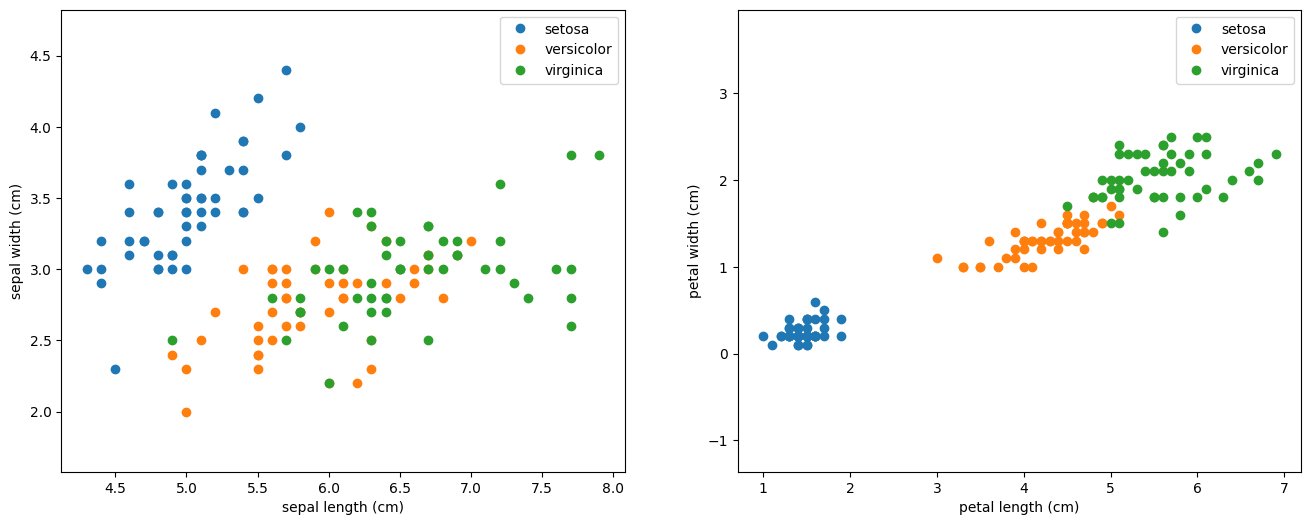

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 414.10it/s]


# Plot training progress

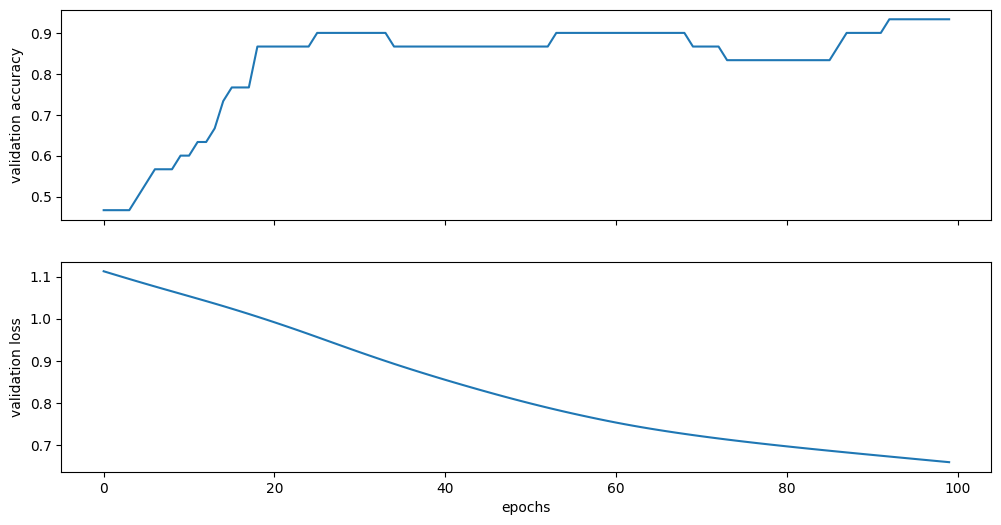

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWER 1

Certainly! Changing the number of hidden layers in a neural network can have a significant impact on its performance and learning capabilities. Increasing the number of hidden layers allows the network to capture more complex patterns and relationships in the data, but it also increases the risk of overfitting. On the other hand, reducing the number of hidden layers may simplify the network and reduce overfitting, but it may also limit its ability to learn intricate patterns.

Let's consider an example of a feedforward neural network with a single hidden layer. Suppose we have an input layer with n inputs, a hidden layer with m neurons, and an output layer with k outputs. The network architecture would be (n inputs) - [m neurons] - (k outputs).

1. Increasing the number of hidden layers: We can add more hidden layers to the network. For example, we can have two hidden layers. The architecture would be (n inputs) - [m neurons] - [m neurons] - (k outputs). Adding more hidden layers allows the network to learn more complex representations of the data.

2. Reducing the number of hidden layers: Alternatively, we can reduce the number of hidden layers. For instance, we can remove the hidden layer and connect the input layer directly to the output layer. The architecture would be (n inputs) - (k outputs). This simplification may make the network more interpretable and reduce overfitting, but it might also limit its ability to learn complex patterns.

It's important to note that the optimal number of hidden layers and neurons within those layers depends on the specific problem, dataset, and other factors. There is no universally optimal choice, and it often requires experimentation and tuning to find the best architecture for a particular task.



ANSWER 2

Certainly! Changing the number of neurons in the hidden layer of a neural network can also have a significant impact on its performance and learning capabilities. The number of neurons in the hidden layer determines the complexity and expressive power of the network.

Increasing the number of neurons in the hidden layer allows the network to learn more complex representations of the data. It provides the network with more capacity to capture intricate patterns and relationships. However, increasing the number of neurons also increases the computational resources required to train and evaluate the network.

On the other hand, reducing the number of neurons in the hidden layer simplifies the network and reduces its capacity to learn complex patterns. This can help prevent overfitting, especially when dealing with smaller datasets or in situations where the complexity of the problem does not require a large number of neurons.

In practice, determining the optimal number of neurons in the hidden layer requires experimentation and tuning. It depends on factors such as the complexity of the problem, the amount of available data, and the computational resources. Starting with a moderate number of neurons and gradually adjusting it while monitoring the network's performance on a validation set is a common approach.

It's important to note that there are no fixed rules or formulas to determine the optimal number of neurons in the hidden layer, as it highly depends on the specific problem and dataset. It's often recommended to try different configurations and use techniques like cross-validation to evaluate the performance of the network with different numbers of neurons in the hidden layer.

ANSWER 3

Certainly! The choice of activation function in a neural network can greatly impact its learning dynamics and performance. Different activation functions introduce non-linearity into the network and allow it to learn complex mappings between inputs and outputs. Here are a few commonly used activation functions:

Rectified Linear Unit (ReLU): ReLU is one of the most widely used activation functions. It applies the function f(x) = max(0, x) element-wise to the input. ReLU has the advantage of being computationally efficient and mitigates the vanishing gradient problem. However, ReLU can lead to dead neurons (neurons that never activate) during training.

Sigmoid: The sigmoid activation function applies the function f(x) = 1 / (1 + e^(-x)) element-wise to the input. It squashes the input values into the range of [0, 1], which can be interpreted as probabilities. Sigmoid is useful in binary classification tasks or when you want the output to be interpreted as probabilities.

Hyperbolic Tangent (tanh): The tanh activation function is similar to the sigmoid function but maps the input values to the range [-1, 1]. It is often preferred over sigmoid for hidden layers as it allows the output to be both positive and negative. Like sigmoid, tanh is useful in classification tasks but can also be used in regression problems.

Leaky ReLU: Leaky ReLU is a variant of ReLU that aims to address the issue of dead neurons. It introduces a small positive slope (typically 0.01) for negative input values, which allows some activation even for negative inputs. This helps prevent the complete "death" of neurons and can lead to better learning in certain scenarios.

Softmax: Softmax is commonly used in the output layer for multi-class classification problems. It takes a vector of real-valued inputs and converts them into a probability distribution over the classes. Softmax ensures that the sum of the probabilities is 1 and allows the model to provide class probabilities for each input.

It's important to note that the choice of activation function depends on the problem at hand and often requires experimentation. Some activation functions work better for specific tasks or architectures, and there is no universally optimal choice. It's recommended to try different activation functions and evaluate their impact on the network's performance and convergence.




